
# Special Topics in Astrodynamics | ae4889

## Time-series prediction on a simple function

#### Import the required packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

C:\Users\pedro\Anaconda3\envs\specialTopics\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\pedro\Anaconda3\envs\specialTopics\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\pedro\Anaconda3\envs\specialTopics\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\pedro\Anaconda3\envs\specialTopics\lib\s

1.13.1


## Generate a dataset for training & validation

Generate your data
* Examine sine waves with a few different amplitudes and frequencies to assess peformance and robustness.
* Start with `sin(x)`.

In [92]:
nPoints = 5000
A = 1
T = 12*2*np.pi
nPast = 5

data = []
for x in np.arange(0,nPoints):
    y = A*np.sin(float(x)*(2*np.pi)/T)
    x = (x%(T))/(T)
#     data.append([x,y])
    data.append([y,x])
data = np.array(data)

past = np.zeros((int(nPoints), int(nPast)))

for i in np.arange(int(nPast),int(nPoints)):
    past[i,:] = data[i-int(nPast):i,0]
# np.vsplit(past,nPoints)

Create a `pandas` dataframe for it

In [99]:
pdata2 = pd.DataFrame(past, columns=np.arange(-nPast,0))
pdata2['y'] = data[:,0]
pdata2 = pdata2.drop(np.arange(nPast))
pdata2

,-5,-4,-3,-2,-1,y
5,0.000000,0.083237,0.165896,0.247404,0.327195,0.404715
6,0.083237,0.165896,0.247404,0.327195,0.404715,0.479426
7,0.165896,0.247404,0.327195,0.404715,0.479426,0.550809
8,0.247404,0.327195,0.404715,0.479426,0.550809,0.618370
9,0.327195,0.404715,0.479426,0.550809,0.618370,0.681639
...,...,...,...,...,...,...
4995,0.909925,0.941292,0.966126,0.984254,0.995551,0.999939
4996,0.941292,0.966126,0.984254,0.995551,0.999939,0.997387
4997,0.966126,0.984254,0.995551,0.999939,0.997387,0.987913
4998,0.984254,0.995551,0.999939,0.997387,0.987913,0.971581


Visual check of the dataset

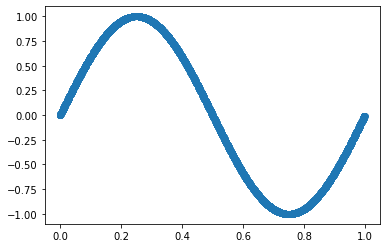

In [62]:
%matplotlib inline
plt.scatter(data[nPast:,1],pdata2['y'])

Split the dataset into training and testing sets

In [63]:
train_dataset = pdata.sample(frac=0.8, random_state=0)
test_dataset = pdata.drop(train_dataset.index)

train_dataset2 = pdata2.sample(frac=0.8, random_state=0)
test_dataset2 = pdata2.drop(train_dataset2.index)

Split features from labels

In [64]:
train_labels2 = train_dataset2.pop('y')
test_labels2 = test_dataset2.pop('y')

In [65]:
train_labels2

1290    0.633331
3595   -0.905277
4383    0.734719
391     0.919736
3822   -0.931728
          ...   
2340    0.219455
71     -0.358367
3315   -0.208610
1450    0.993048
4480    0.493572
Name: y, Length: 3988, dtype: float64

##### Create a model

In [66]:
def build_model():
    model = keras.Sequential([
        layers.Dense(25, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(25, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mse',
                optimizer='adam',
                metrics=['accuracy'])
    return model

def build_model2():
    model = keras.Sequential([
        layers.Dense(25, activation='relu', input_shape=[len(train_dataset2.keys())]),
        layers.Dense(25, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mse',
                optimizer='adam',
                metrics=['accuracy'])
    return model

In [67]:
model = build_model()
model2 = build_model2()

In [68]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 25)                400       
_________________________________________________________________
dense_16 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 26        
Total params: 1,076
Trainable params: 1,076
Non-trainable params: 0
_________________________________________________________________


#### Train the model

In [69]:
history = model2.fit(train_dataset2, train_labels2, validation_split=0.2, epochs=4)

Train on 3190 samples, validate on 798 samples
Epoch 1/4
3190/3190 [==============================] - 1s 188us/sample - loss: 0.1094 - acc: 3.1348e-04 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 2/4
3190/3190 [==============================] - 0s 78us/sample - loss: 5.4391e-04 - acc: 3.1348e-04 - val_loss: 1.9423e-04 - val_acc: 0.0000e+00
Epoch 3/4
3190/3190 [==============================] - 0s 77us/sample - loss: 1.4129e-04 - acc: 3.1348e-04 - val_loss: 9.7096e-05 - val_acc: 0.0000e+00
Epoch 4/4
3190/3190 [==============================] - 0s 66us/sample - loss: 7.5792e-05 - acc: 3.1348e-04 - val_loss: 6.1381e-05 - val_acc: 0.0000e+00


Visualize the model's training progress via the history object

In [70]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,acc,val_loss,val_acc,epoch
0,0.109428,0.000313,0.001672,0.0,0
1,0.000544,0.000313,0.000194,0.0,1
2,0.000141,0.000313,0.000097,0.0,2
3,0.000076,0.000313,0.000061,0.0,3


## Basic regression: predict future values of the sine function

#### Predict with the model

If you trained on `n` points (eg. `n = 49`), now predict the value of point `n+1`

Once you have predicted a single future point, develop a 'rolling' predictor which drops the first point and predicts point `n+2` based on the set of points `[2,n+1]`.

Examine the quality of the results for the mechanism to predict points into the future.

____

#### Plot the history

Text(0.5, 1.0, 'model loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

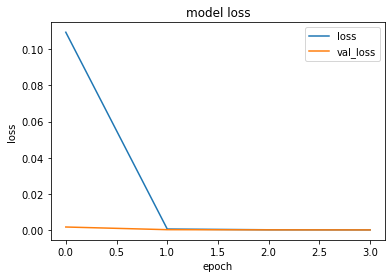

In [71]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()

Are `10` epochs too few? If so, try training for more epochs.

In [72]:
test_predictions2 = model2.predict(test_dataset2).flatten()

### Make predictions

Finally, predict values using data in the test set:

Text(0.5, 0, 'True Values')

Text(0, 0.5, 'Predictions')

(-2.0, 2.0)

(-2.0, 2.0)

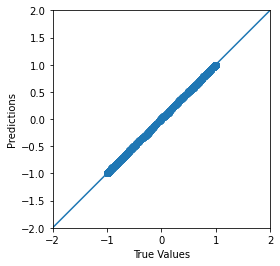

In [73]:
test_predictions2 = model2.predict(test_dataset2).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels2, test_predictions2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.xlim([-2,2])
plt.ylim([-2,2])
_ = plt.plot([-2,2], [-2,2])

In [74]:
%matplotlib inline
plt.scatter(test_dataset2['x'],test_predictions2)

KeyError: 'x'

Take a look at the error distribution.

(array([ 10.,   8.,   6.,   9.,  10.,  13.,  30.,  25.,  25.,  19.,  21.,
         41.,  63., 102., 195., 112.,  94.,  65.,  41.,  34.,  25.,  23.,
         10.,  10.,   6.]),
 array([-0.02216752, -0.02051102, -0.01885452, -0.01719801, -0.01554151,
        -0.01388501, -0.01222851, -0.010572  , -0.0089155 , -0.007259  ,
        -0.0056025 , -0.00394599, -0.00228949, -0.00063299,  0.00102351,
         0.00268002,  0.00433652,  0.00599302,  0.00764952,  0.00930602,
         0.01096253,  0.01261903,  0.01427553,  0.01593203,  0.01758854,
         0.01924504]),
 <a list of 25 Patch objects>)

Text(0.5, 0, 'Prediction Error')

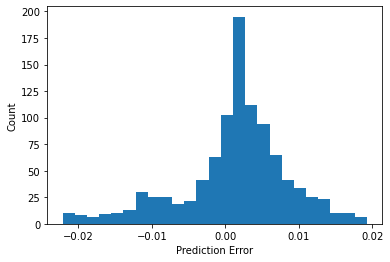

In [75]:
error = test_predictions2 - test_labels2
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [90]:
nMax = 750

data = []
for x in np.arange(0,nMax):
    if x<nPast:
        y = A*np.sin(float(x)*(2*np.pi)/T)
    else:
        y = 0
    xn = (x%(T))/(T)
    data.append([xn,x,y])
data = np.array(data)

# past = np.zeros((1, int(nPast)))
past = data[0:int(nPast),2]

test = pd.DataFrame([past], columns=np.arange(-nPast,0))
# test.loc[:,'x'] = data[int(nPast),0]
test.loc[:,'y'] = data[int(nPast),2]

df1 = pd.DataFrame({'xn':data[:,0], 'x':data[:,1], 'y':data[:,2]})

for i in np.arange(0,int(nMax-nPast)):
    test.loc[i,'y'] = model2.predict(test.iloc[i:i+1,:].drop('y',axis=1))
    if i != int(nMax-nPast-1):
        test.loc[i+1,0:nPast] = test.iloc[i,:].shift(-1)
test

,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,y
0,0.000000,0.083237,0.165896,0.247404,0.327195,0.404715,0.479426,0.550809,0.618370,0.681639,0.740177,0.793578,0.841471,0.883524,0.919445,0.953557
1,0.083237,0.165896,0.247404,0.327195,0.404715,0.479426,0.550809,0.618370,0.681639,0.740177,0.793578,0.841471,0.883524,0.919445,0.953557,0.967329
2,0.165896,0.247404,0.327195,0.404715,0.479426,0.550809,0.618370,0.681639,0.740177,0.793578,0.841471,0.883524,0.919445,0.953557,0.967329,0.976033
3,0.247404,0.327195,0.404715,0.479426,0.550809,0.618370,0.681639,0.740177,0.793578,0.841471,0.883524,0.919445,0.953557,0.967329,0.976033,0.988208
4,0.327195,0.404715,0.479426,0.550809,0.618370,0.681639,0.740177,0.793578,0.841471,0.883524,0.919445,0.953557,0.967329,0.976033,0.988208,0.997227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,-0.824578,-0.852448,-0.888714,-0.932549,-0.962363,-0.968472,-0.957514,-0.951236,-0.944535,-0.933378,-0.917410,-0.893517,-0.859399,-0.812195,-0.758815,-0.710369
731,-0.852448,-0.888714,-0.932549,-0.962363,-0.968472,-0.957514,-0.951236,-0.944535,-0.933378,-0.917410,-0.893517,-0.859399,-0.812195,-0.758815,-0.710369,-0.660831
732,-0.888714,-0.932549,-0.962363,-0.968472,-0.957514,-0.951236,-0.944535,-0.933378,-0.917410,-0.893517,-0.859399,-0.812195,-0.758815,-0.710369,-0.660831,-0.604258
733,-0.932549,-0.962363,-0.968472,-0.957514,-0.951236,-0.944535,-0.933378,-0.917410,-0.893517,-0.859399,-0.812195,-0.758815,-0.710369,-0.660831,-0.604258,-0.538900


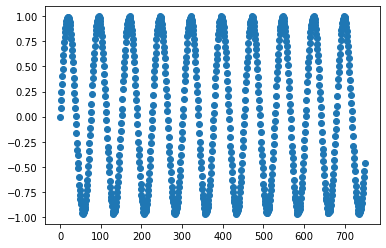

In [91]:
ynew = np.append(df1.loc[:nPast-1,'y'], test.loc[:,'y'])

%matplotlib inline
plt.scatter(df1['x'],ynew)

____

## Questions to consider

* How well does your ANN predict beyond the range of data it was trained on?

See the Phase 1 assignment description for additional guidance.

____

## Copyright & license details